<a href="https://colab.research.google.com/github/JOEJOSEJOSEPH/Decision_tree_2/blob/main/Decision_tree_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')

In [ ]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
df.shape

(4340, 8)

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [ ]:
x = df.seller_type.replace({"Individual":0,"Dealer":1,"Trustmark Dealer":2})
df.insert(df.columns.get_loc("seller_type"),'new_seller_type',x)

In [ ]:
df

,name,year,selling_price,km_driven,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,0,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,0,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,0,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,0,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,0,Individual,Manual,First Owner


In [ ]:
df.new_seller_type.unique()

array([0, 1, 2])

In [ ]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
x = df.fuel.replace({"Petrol":0,"Diesel":1,"CNG":2,"LPG":3,"Electric":4})
df.insert(df.columns.get_loc("fuel"),'new_fuel',x)

In [ ]:
df

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,Diesel,0,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,Diesel,0,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,0,Petrol,0,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,Diesel,0,Individual,Manual,First Owner


In [ ]:
df.new_fuel.unique()

array([0, 1, 2, 3, 4])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['transmission'] = LabelEncoder().fit_transform(df['transmission'])
df['owner'] = LabelEncoder().fit_transform(df['owner'])

In [ ]:
df

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,1,0
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,1,2
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,Diesel,0,Individual,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,Diesel,0,Individual,1,2
4337,Maruti 800 AC BSIII,2009,110000,83000,0,Petrol,0,Individual,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,Diesel,0,Individual,1,0


In [ ]:
# Create a column no_of_years = current year - year
df['current_year'] = 2024

In [ ]:
df['no_of_years'] = df['current_year'] - df['year']

In [ ]:
df

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner,current_year,no_of_years
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,1,0,2024,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,1,0,2024,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,1,0,2024,12
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,1,0,2024,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,1,2,2024,10
...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,Diesel,0,Individual,1,2,2024,10
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,Diesel,0,Individual,1,2,2024,10
4337,Maruti 800 AC BSIII,2009,110000,83000,0,Petrol,0,Individual,1,2,2024,15
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,Diesel,0,Individual,1,0,2024,8


In [ ]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner,current_year,no_of_years
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,1,0,2024,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,1,0,2024,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,1,0,2024,12
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,1,0,2024,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,1,2,2024,10


In [ ]:
# Drop columns - name, year, cureent_year
# Rename selling_price to current_selling_price
df.drop(['name','year','current_year'],axis=1,inplace=True)
df.rename(columns={'selling_price':'current_selling_price'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   current_selling_price  4340 non-null   int64 
 1   km_driven              4340 non-null   int64 
 2   new_fuel               4340 non-null   int64 
 3   fuel                   4340 non-null   object
 4   new_seller_type        4340 non-null   int64 
 5   seller_type            4340 non-null   object
 6   transmission           4340 non-null   int64 
 7   owner                  4340 non-null   int64 
 8   no_of_years            4340 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 305.3+ KB


In [ ]:
df.corr()

<ipython-input-29-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,current_selling_price,km_driven,new_fuel,new_seller_type,transmission,owner,no_of_years
current_selling_price,1.000000,-0.192289,0.226883,0.240666,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,0.274760,-0.187131,0.120226,0.297115,0.419688
new_fuel,0.226883,0.274760,1.000000,0.011358,-0.027507,0.021907,-0.090388
new_seller_type,0.240666,-0.187131,0.011358,1.000000,-0.200191,-0.238281,-0.182458
transmission,-0.530205,0.120226,-0.027507,-0.200191,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,0.021907,-0.238281,0.078893,1.000000,0.414705
no_of_years,-0.413922,0.419688,-0.090388,-0.182458,0.143800,0.414705,1.000000


<ipython-input-30-c13c3c0f073b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Greens')


<Axes: >

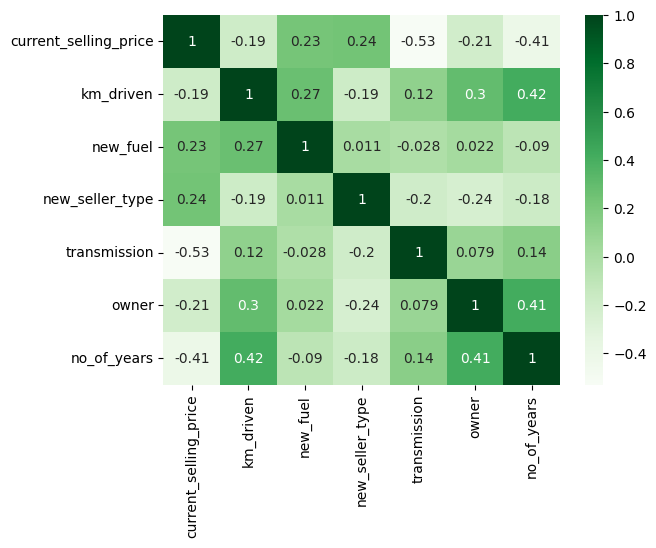

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

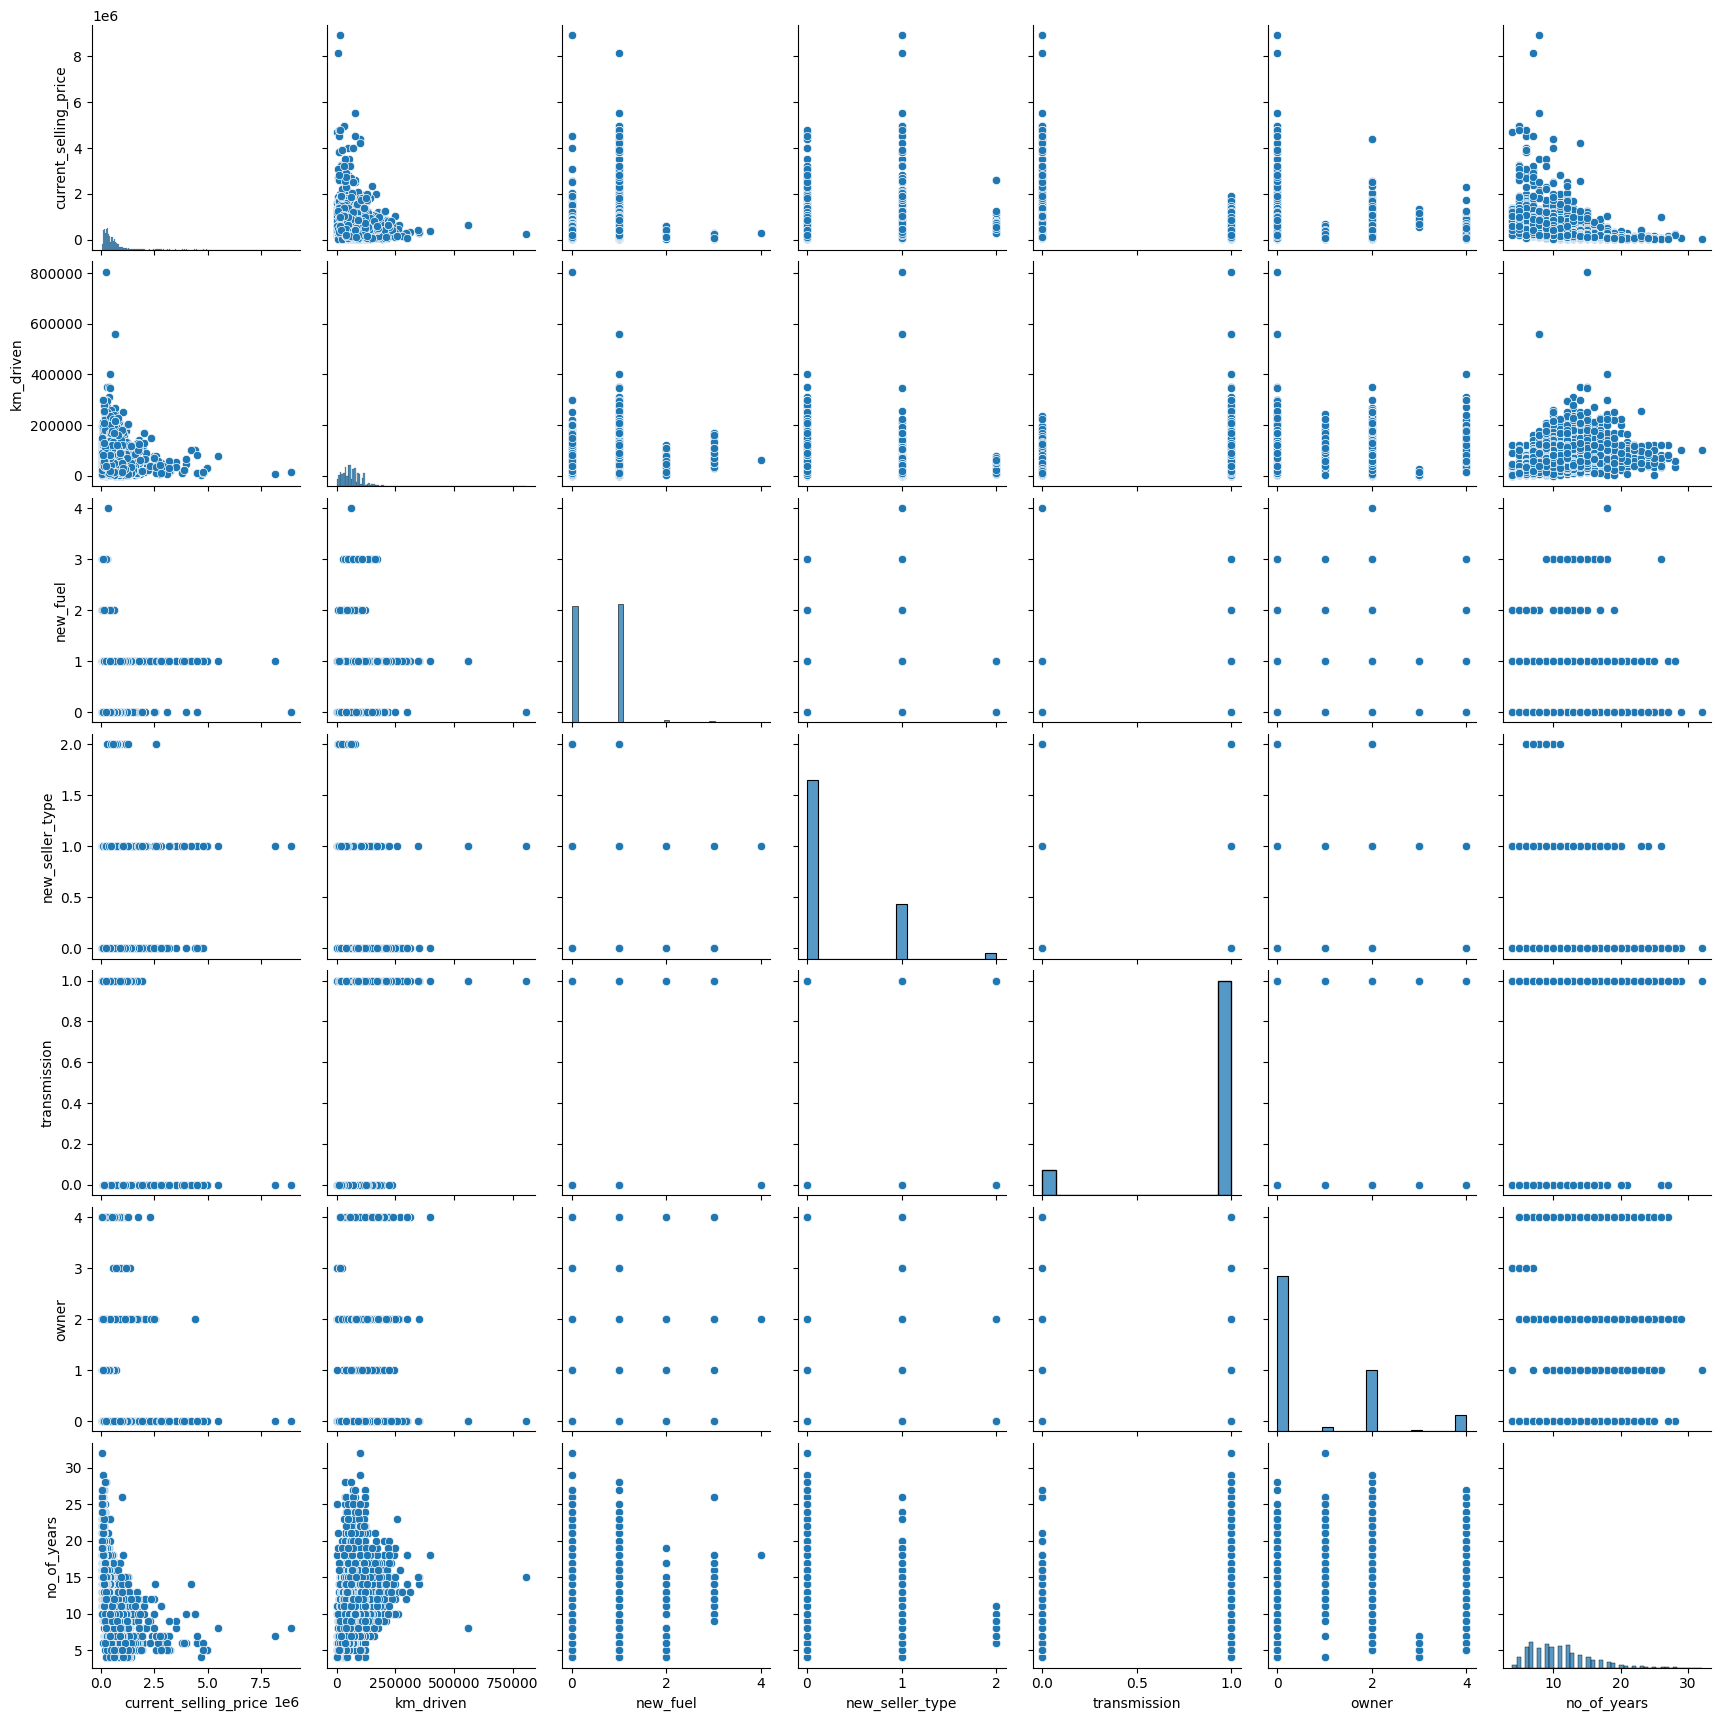

In [ ]:
sns.pairplot(df)

<Axes: >

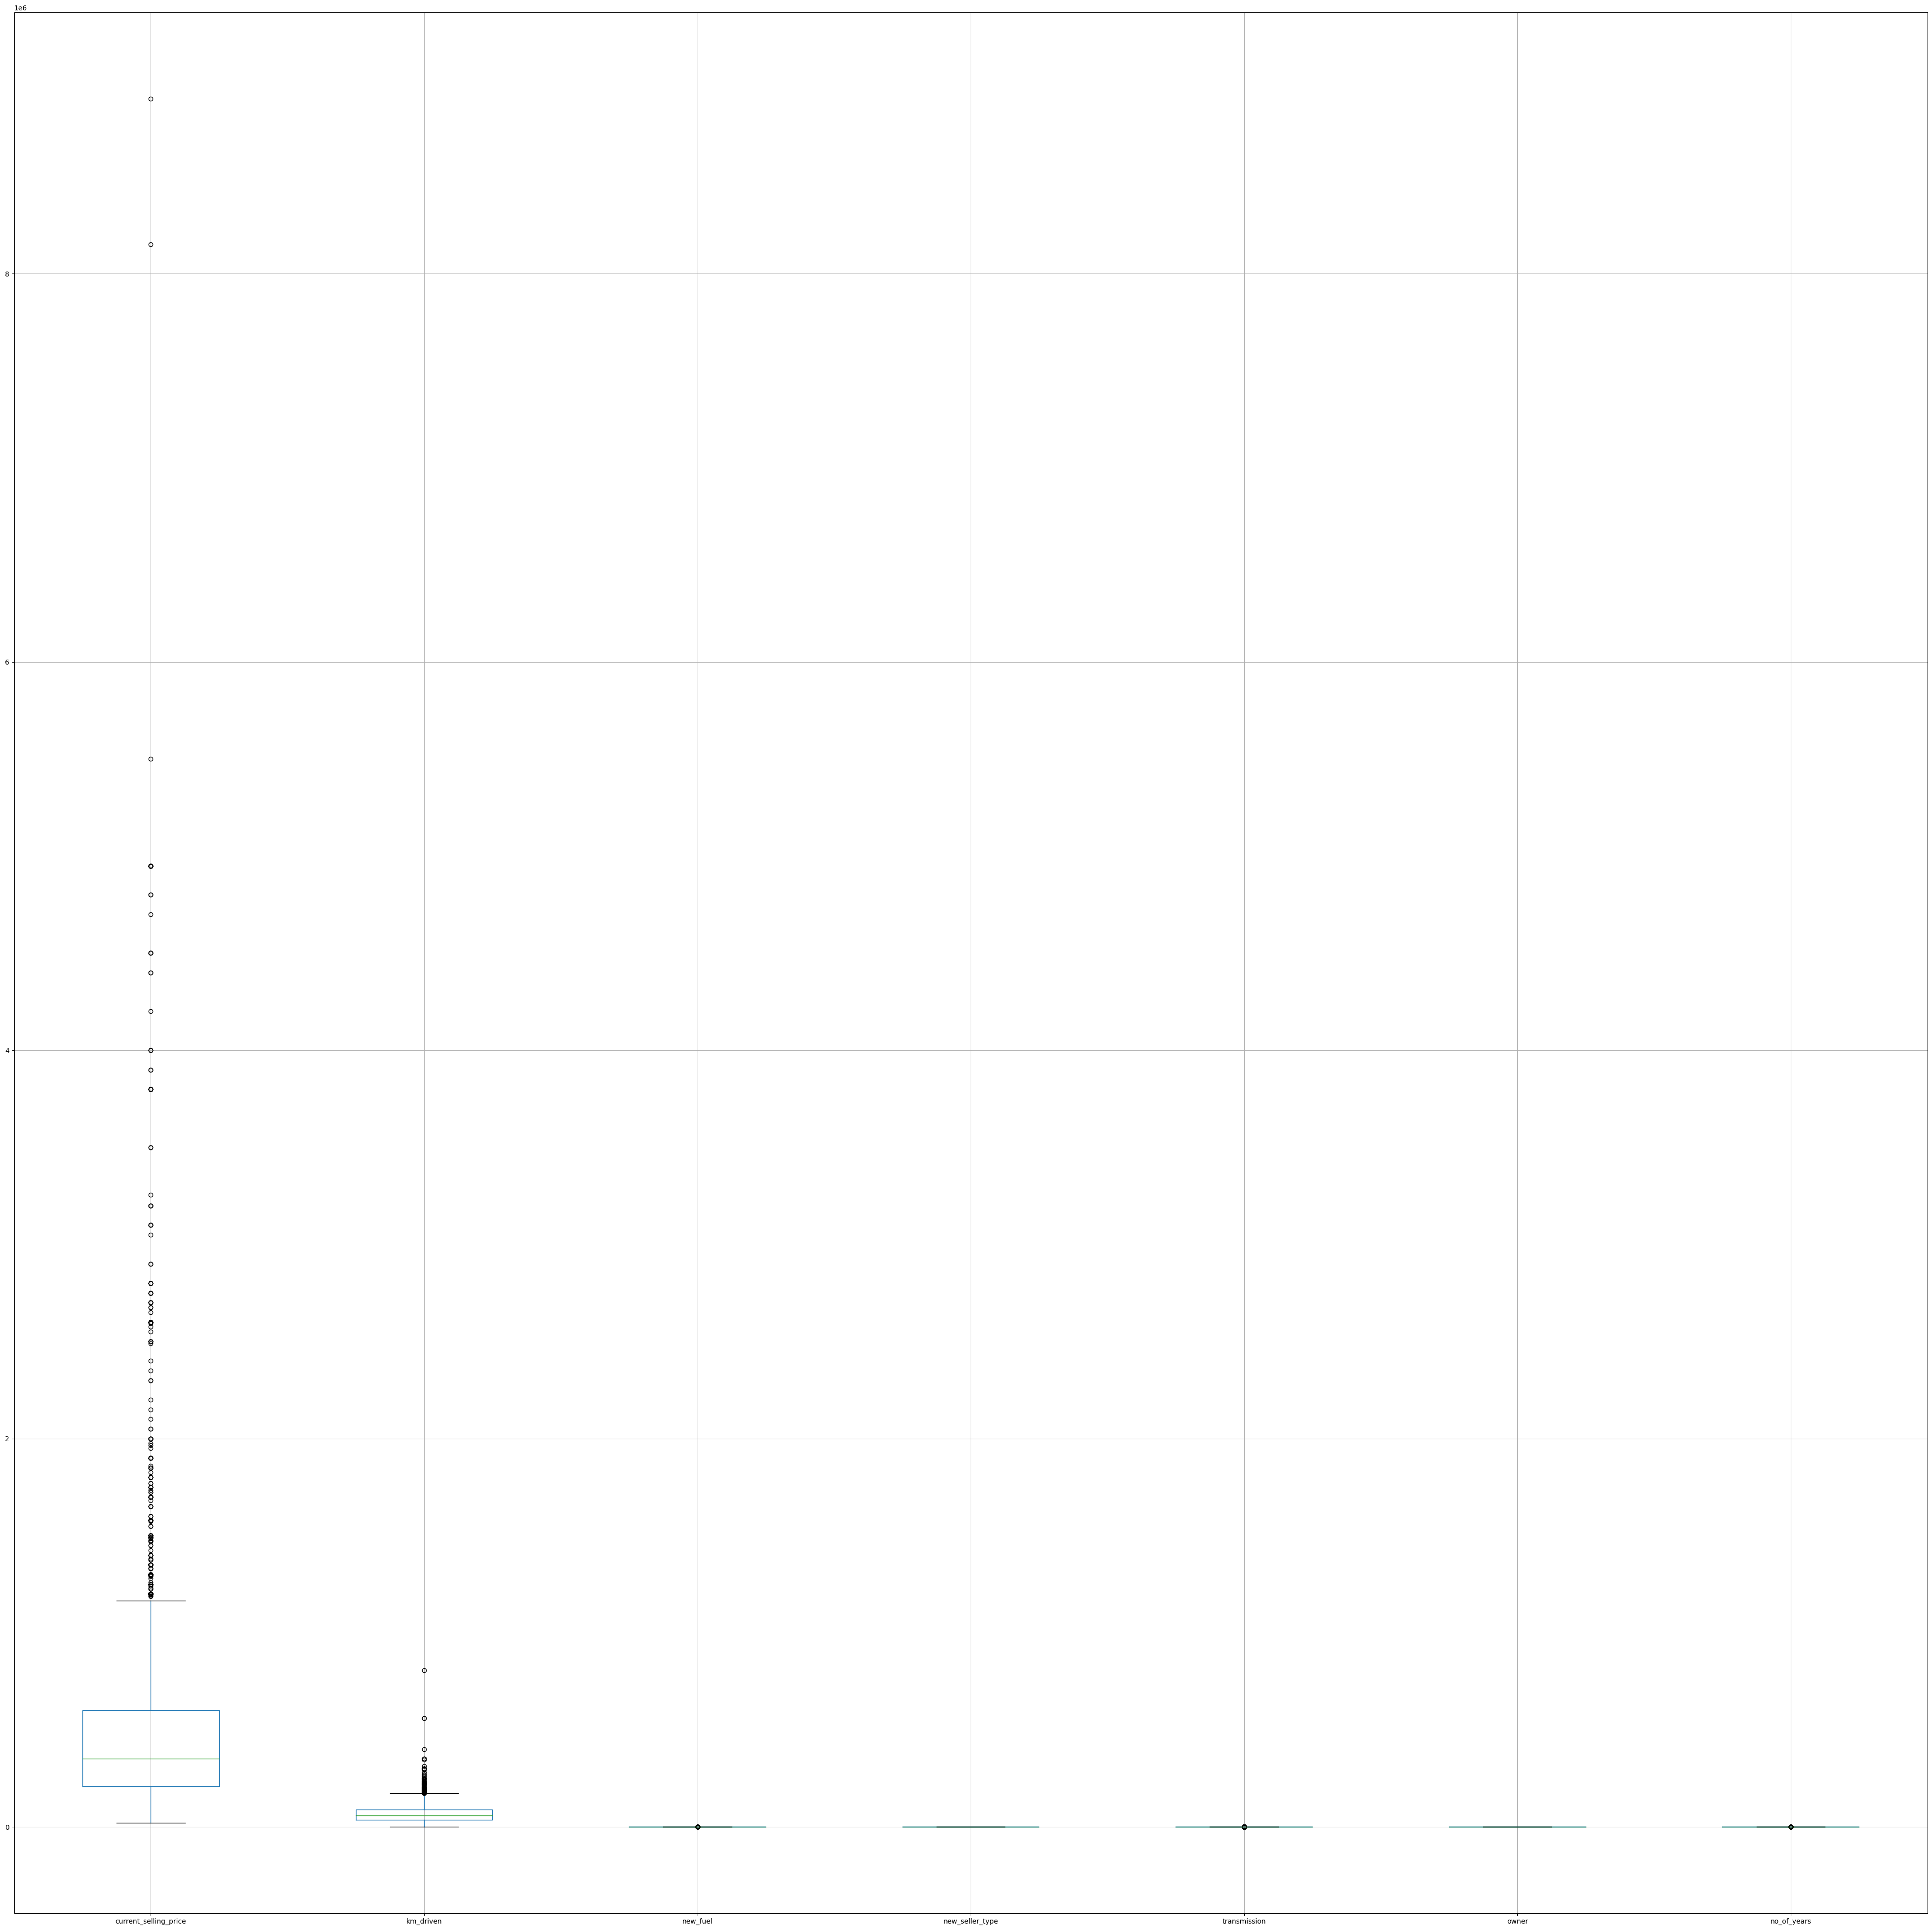

In [ ]:
plt.figure(figsize=(50,50))
df.boxplot()

In [ ]:
df.drop(['fuel','seller_type'],axis=1,inplace=True)

In [ ]:
X = np.array(df.drop('current_selling_price',axis=1))
y = np.array(df.current_selling_price)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
len(y_train)

3472

In [ ]:
regressor = DecisionTreeRegressor()

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
target = pd.DataFrame({"Actual":y_test.reshape(-1), "Predicted":y_pred.reshape(-1)})

In [ ]:
target

,Actual,Predicted
0,480000,450000.0
1,565000,565000.0
2,750000,640000.0
3,100000,100000.0
4,851000,851000.0
...,...,...
863,250000,280000.0
864,640000,280000.0
865,70000,70000.0
866,350000,812500.0


<Axes: >

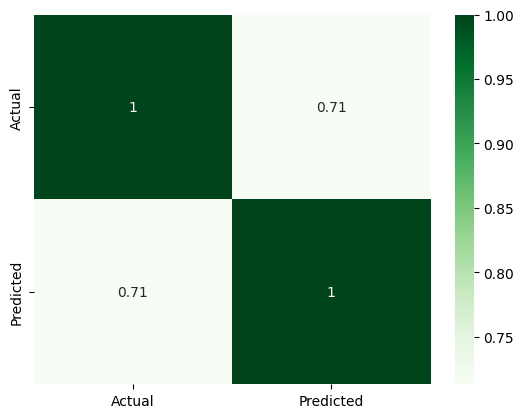

In [ ]:
sns.heatmap(target.corr(), annot=True, cmap='Greens')

In [ ]:
r2_score(y_test,y_pred)

0.4111999591376413

In [ ]:
df.columns

Index(['current_selling_price', 'km_driven', 'new_fuel', 'new_seller_type',
       'transmission', 'owner', 'no_of_years'],
      dtype='object')